In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
df = pd.read_csv(r"train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
pd.reset_option('all')

/tmp/ipython-input-5-2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/tmp/ipython-input-5-2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [6]:
df.title

,title
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...
...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,Macy’s Is Said to Receive Takeover Approach by...
20798,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [7]:
df['text']

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...
...,...
20795,Rapper T. I. unloaded on black celebrities who...
20796,When the Green Bay Packers lost to the Washing...
20797,The Macy’s of today grew from the union of sev...
20798,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [8]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [9]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [10]:
df['label'].value_counts()

,count
label,
0,10361
1,7924


In [11]:
df.isnull().sum()

,0
index,0
id,0
title,0
author,0
text,0
label,0


In [12]:
import re
import string

In [13]:
alphanumeric = lambda x: re.sub('\w*\d\w*',' ',x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ',x.lower())
remove_n = lambda x: re.sub('\n',' ',x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)
df.text =df.text.map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]


In [19]:
X = df['text']

In [20]:
y = df['label']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [22]:
tfidvect = TfidfVectorizer(stop_words = 'english',max_df = 0.7)
tfid_train = tfidvect.fit_transform(X_train)
tfid_test = tfidvect.transform(X_test)

In [23]:
print(tfid_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1397914 stored elements and shape (5486, 116917)>
  Coords	Values
  (0, 608)	0.036055157346617656
  (0, 610)	0.029408460028627847
  (0, 617)	0.021897451396641617
  (0, 649)	0.03775157989173711
  (0, 739)	0.057872186592901935
  (0, 742)	0.03614921640470153
  (0, 743)	0.02307965616356353
  (0, 964)	0.019823026700420965
  (0, 1325)	0.035470551672039864
  (0, 1359)	0.04440996084421274
  (0, 1839)	0.05032437503079744
  (0, 1845)	0.02898340586791531
  (0, 1884)	0.03385564111016381
  (0, 2105)	0.028674270645074093
  (0, 2880)	0.057809481515821486
  (0, 2882)	0.028110512255344913
  (0, 2883)	0.030235665449573443
  (0, 3481)	0.0662456159932774
  (0, 3485)	0.09663121856519076
  (0, 3499)	0.01855818850603103
  (0, 4437)	0.07615962020565757
  (0, 4731)	0.02861415995250655
  (0, 4883)	0.0393170584851693
  (0, 4887)	0.025313906079565036
  (0, 5384)	0.036848492268189044
  :	:
  (5485, 96848)	0.30220864119157675
  (5485, 97650)	0.0613784349

In [24]:
print(tfidvect.get_feature_names_out()[-10:])

['zwrotu' 'zwyci' 'zy' 'zyaira' 'zygankow' 'zylinderkopfdichtung' 'zynga'
 'zytsov' 'zyuganov' 'zzzzs']


In [25]:
countvect = CountVectorizer(stop_words='english')
count_train = countvect.fit_transform(X_train.values)
count_test = countvect.transform(X_test.values)

In [26]:
print(count_test)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1397914 stored elements and shape (5486, 116917)>
  Coords	Values
  (0, 608)	1
  (0, 610)	1
  (0, 617)	1
  (0, 649)	1
  (0, 739)	2
  (0, 742)	1
  (0, 743)	1
  (0, 964)	1
  (0, 1325)	2
  (0, 1359)	1
  (0, 1839)	2
  (0, 1845)	1
  (0, 1884)	1
  (0, 2105)	1
  (0, 2880)	2
  (0, 2882)	1
  (0, 2883)	1
  (0, 3481)	4
  (0, 3485)	7
  (0, 3499)	1
  (0, 4437)	3
  (0, 4731)	1
  (0, 4883)	1
  (0, 4887)	1
  (0, 5384)	1
  :	:
  (5485, 96848)	5
  (5485, 97650)	1
  (5485, 98159)	2
  (5485, 98435)	1
  (5485, 99123)	1
  (5485, 103967)	1
  (5485, 104271)	1
  (5485, 104377)	3
  (5485, 104982)	1
  (5485, 105466)	2
  (5485, 105699)	1
  (5485, 106478)	4
  (5485, 106574)	1
  (5485, 106600)	1
  (5485, 107849)	1
  (5485, 108456)	1
  (5485, 109805)	1
  (5485, 111446)	1
  (5485, 112423)	1
  (5485, 112605)	2
  (5485, 113875)	1
  (5485, 114130)	1
  (5485, 114669)	1
  (5485, 114803)	1
  (5485, 115553)	1


In [27]:
print(countvect.get_feature_names_out()[:10])

['aa' 'aaa' 'aaaaah' 'aaaaggg' 'aaah' 'aaahhh' 'aaany' 'aab' 'aabb'
 'aachen']


Training the model
===

Naive Bayes
----

Tf-idf Vectorize
-

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
model = MultinomialNB()
model.fit(tfid_train,y_train)
pred = model.predict(tfid_test)

In [30]:
accuracy_score(y_test,pred)

0.7876412686839227

In [31]:
cf = confusion_matrix(y_test,pred)

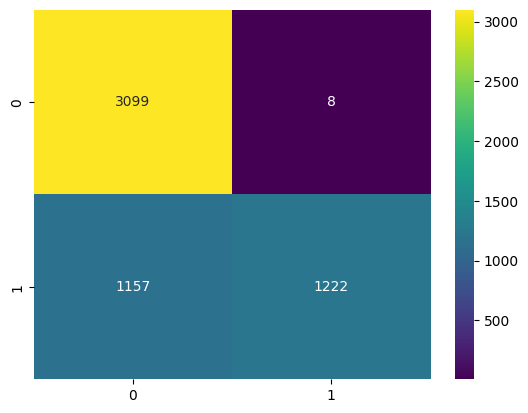

In [32]:
sns.heatmap(cf,annot = True,fmt='d',cmap = 'viridis')
plt.show()

Count Vectorizer
-

In [33]:
model = MultinomialNB()
model.fit(count_train,y_train)
pred = model.predict(count_test)

In [34]:
model.score(count_test,y_test)

0.9039372949325556

In [35]:
cf = confusion_matrix(pred,y_test)

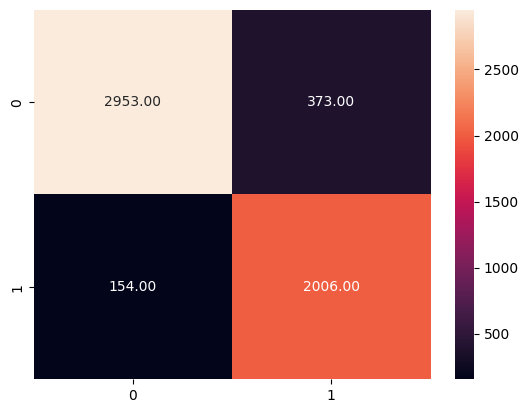

In [36]:
sns.heatmap(cf,annot = True, fmt = '.2f')
plt.show()

Random Forest
---

Tf-idf Vectorizer
-

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier()
model.fit(tfid_train,y_train)
pred = model.predict(tfid_test)
model.score(tfid_test,y_test)

0.912869121399927

In [39]:
cf = confusion_matrix(pred,y_test)

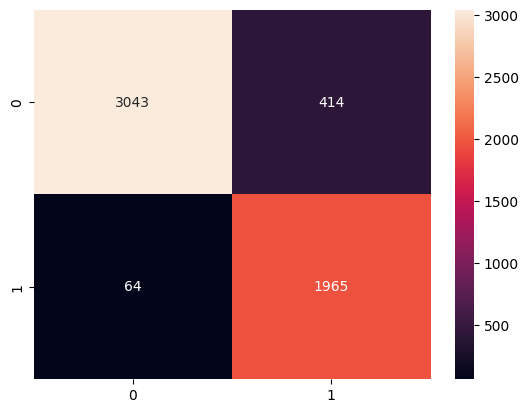

In [40]:
sns.heatmap(cf,annot =True, fmt ='d')
plt.show()

Count Vectorizer
-

In [41]:
model = RandomForestClassifier()
model.fit(count_train,y_train)
pred = model.predict(count_test)
model.score(count_test,y_test)

0.9097703244622676

In [42]:
cf = confusion_matrix(pred,y_test)

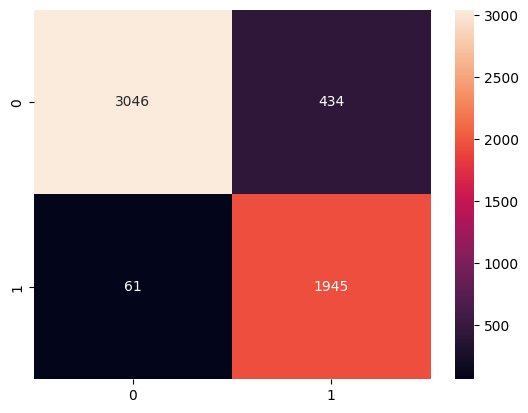

In [43]:
sns.heatmap(cf,annot = True, fmt= 'd')
plt.show()

K-Nearest Neighbours
---

Tf-idf Vectorize
-

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
model = KNeighborsClassifier().fit(tfid_train,y_train)
pred = model.predict(tfid_test)
model.score(tfid_test,y_test)

0.492344148742253

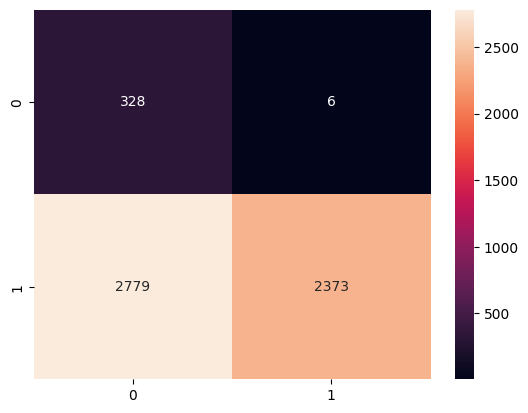

In [46]:
cf = confusion_matrix(pred,y_test)
sns.heatmap(cf,annot = True, fmt = 'd')
plt.show()

Count Vetorize
-

In [47]:
model = KNeighborsClassifier().fit(count_train,y_train)
pred = model.predict(count_test)
model.score(count_test,y_test)

0.7382427998541743

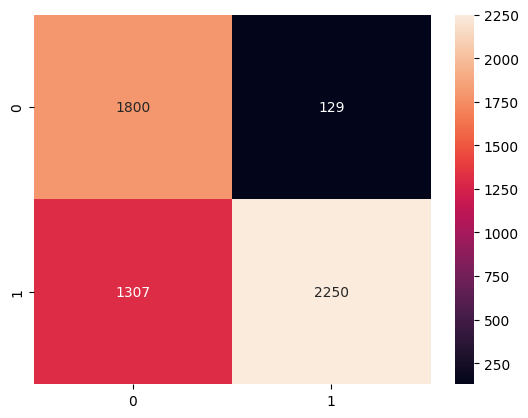

In [48]:
cf = confusion_matrix(pred,y_test)
sns.heatmap(cf, annot = True, fmt = 'd')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True